<a href="https://colab.research.google.com/github/GuilleLondero/ML_challenge_one_DS_telecomX/blob/main/Challenge_TelecomX2_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Importaciones**

In [1]:
# Conexion de google colab con drive:
from google.colab import drive

# Importar librerías básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# **2. Extracción del Archivo Tratado**

In [2]:

df_ml_inicial = pd.read_csv('/content/drive/MyDrive/ONE/DATA SCIENCE/ML_challenge_TelecomX2/telecomX1_datos_tratados.csv')

print("✅ Datos cargados desde Drive")
print(f"Shape: {df_ml_inicial.shape}")

✅ Datos cargados desde Drive
Shape: (7043, 22)


In [3]:
df_ml_inicial.head()

,Id_Cliente,Fuga_Cliente,Genero,Ciudadano_Mayor,Tiene_Pareja,Tiene_Dependientes,Antiguedad_Meses,Servicio_Telefono,Lineas_Multiples,Servicio_Internet,...,Proteccion_Dispositivo,Soporte_Tecnico,TV_Streaming,Peliculas_Streaming,Tipo_Contrato,Facturacion_Digital,Metodo_Pago,Cargo_Mensual,Cargo_Total,Cargo_Diario
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.80


# **3. Eliminación de Columnas Irrelevantes**

In [4]:
# Identificar columnas a eliminar
columnas_a_eliminar = ['Id_Cliente']  # ID único - no aporta valor predictivo

# Crear dataset limpio sin columnas irrelevantes
df_ml = df_ml_inicial.drop(columns=columnas_a_eliminar)

In [5]:
df_ml.head(2)

,Fuga_Cliente,Genero,Ciudadano_Mayor,Tiene_Pareja,Tiene_Dependientes,Antiguedad_Meses,Servicio_Telefono,Lineas_Multiples,Servicio_Internet,Seguridad_Online,...,Proteccion_Dispositivo,Soporte_Tecnico,TV_Streaming,Peliculas_Streaming,Tipo_Contrato,Facturacion_Digital,Metodo_Pago,Cargo_Mensual,Cargo_Total,Cargo_Diario
0,0,Female,0,1,1,9,1,0,DSL,0,...,0,1,1,0,One year,1,Mailed check,65.6,593.3,2.19
1,0,Male,0,0,0,9,1,1,DSL,0,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.4,2.00


# **4. Encoding**

## **4.1. 🔍 Identificación automática: Separamos variables por tipo de dato (numéricas vs categóricas)**

In [6]:
# Identificar variables categóricas y numéricas
numericas = df_ml.select_dtypes(include=['int64', 'float64']).columns.tolist()
categoricas = df_ml.select_dtypes(include=['object']).columns.tolist()

print("🔍 ANÁLISIS DE TIPOS DE VARIABLES:")
print(f"Variables numéricas ({len(numericas)}): {numericas}")
print(f"Variables categóricas ({len(categoricas)}): {categoricas}")

🔍 ANÁLISIS DE TIPOS DE VARIABLES:
Variables numéricas (17): ['Fuga_Cliente', 'Ciudadano_Mayor', 'Tiene_Pareja', 'Tiene_Dependientes', 'Antiguedad_Meses', 'Servicio_Telefono', 'Lineas_Multiples', 'Seguridad_Online', 'Respaldo_Online', 'Proteccion_Dispositivo', 'Soporte_Tecnico', 'TV_Streaming', 'Peliculas_Streaming', 'Facturacion_Digital', 'Cargo_Mensual', 'Cargo_Total', 'Cargo_Diario']
Variables categóricas (4): ['Genero', 'Servicio_Internet', 'Tipo_Contrato', 'Metodo_Pago']


## **4.2. 📊 Análisis de categorías: Verifico cuántas categorías únicas tiene cada variable categórica**

In [7]:
# Analizar categorías únicas en variables categóricas
if categoricas:
    print("\n📊 ANÁLISIS DE CATEGORÍAS:")
    for col in categoricas:
        unique_vals = df_ml[col].nunique()
        categories = df_ml[col].unique()
        print(f"{col}: {unique_vals} categorías → {list(categories)}")


📊 ANÁLISIS DE CATEGORÍAS:
Genero: 2 categorías → ['Female', 'Male']
Servicio_Internet: 3 categorías → ['DSL', 'Fiber optic', 'No']
Tipo_Contrato: 3 categorías → ['One year', 'Month-to-month', 'Two year']
Metodo_Pago: 4 categorías → ['Mailed check', 'Electronic check', 'Credit card (automatic)', 'Bank transfer (automatic)']


## **4.3. ⚡ One-Hot Encoding: Uso pd.get_dummies() con:**

drop_first=True: Evita multicolinealidad perfecta

dtype=int: Variables binarias como enteros (0/1)

In [8]:
# Aplicar One-Hot Encoding
print(f"\n⚡ APLICANDO ONE-HOT ENCODING...")
print(f"Columnas antes del encoding: {df_ml.shape[1]}")

# Crear dataset con encoding
df_encoded = pd.get_dummies(df_ml, columns=categoricas, drop_first=True, dtype=int)

print(f"Columnas después del encoding: {df_encoded.shape[1]}")
print(f"Nuevas columnas creadas: {df_encoded.shape[1] - df_ml.shape[1]}")


⚡ APLICANDO ONE-HOT ENCODING...
Columnas antes del encoding: 21
Columnas después del encoding: 25
Nuevas columnas creadas: 4


## **4.4. 🆕 Nuevas columnas: Cada categoría se convierte en una columna binaria**

In [9]:
# Mostrar nuevas columnas creadas
nuevas_columnas = [col for col in df_encoded.columns if col not in df_ml.columns]
if nuevas_columnas:
    print(f"\n🆕 NUEVAS COLUMNAS GENERADAS ({len(nuevas_columnas)}):")
    for col in nuevas_columnas:
        print(f"  • {col}")


🆕 NUEVAS COLUMNAS GENERADAS (8):
  • Genero_Male
  • Servicio_Internet_Fiber optic
  • Servicio_Internet_No
  • Tipo_Contrato_One year
  • Tipo_Contrato_Two year
  • Metodo_Pago_Credit card (automatic)
  • Metodo_Pago_Electronic check
  • Metodo_Pago_Mailed check


## **4.5. ✅ Verificación: Confirmo que el encoding funcionó correctamente**

In [10]:
# Verificar estructura final
print(f"\n✅ ENCODING COMPLETADO:")
print(f"Dataset final: {df_encoded.shape[0]} filas × {df_encoded.shape[1]} columnas")
print(f"Target 'Fuga_Cliente' preservado: {'Fuga_Cliente' in df_encoded.columns}")

# Guardar resultado para los siguientes pasos
df_ml_encoded = df_encoded.copy()
print("🚀 Dataset listo para análisis de correlación")


✅ ENCODING COMPLETADO:
Dataset final: 7043 filas × 25 columnas
Target 'Fuga_Cliente' preservado: True
🚀 Dataset listo para análisis de correlación


# **5. Análisis de Correlación + Multicolinealidad**

## **5.1. 🎯 Correlación con Target:**
**Identificamos qué variables predicen mejor la cancelación (ordenadas por correlación absoluta)**

In [11]:
# Calcular matriz de correlación
correlation_matrix = df_ml_encoded.corr()

# 1. CORRELACIÓN CON EL TARGET (Fuga_Cliente) ("Variable objetivo")
target_correlations = correlation_matrix['Fuga_Cliente'].abs().sort_values(ascending=False)
print("🎯 TOP 10 VARIABLES MÁS CORRELACIONADAS CON FUGA_Cliente:")
print(target_correlations.head(10))

🎯 TOP 10 VARIABLES MÁS CORRELACIONADAS CON FUGA_Cliente:
Fuga_Cliente                     1.000000
Antiguedad_Meses                 0.352229
Servicio_Internet_Fiber optic    0.308020
Tipo_Contrato_Two year           0.302253
Metodo_Pago_Electronic check     0.301919
Servicio_Internet_No             0.227890
Cargo_Total                      0.199484
Cargo_Diario                     0.193412
Cargo_Mensual                    0.193356
Facturacion_Digital              0.191825
Name: Fuga_Cliente, dtype: float64


## **5.2. 🚨 Detección de Multicolinealidad:**
**Buscamos variables altamente correlacionadas entre sí (|r| > 0.8) que pueden confundir al modelo**

In [12]:
# 2. IDENTIFICAR MULTICOLINEALIDAD (variables entre sí)
# Buscar correlaciones altas (>0.8) excluyendo diagonal
mask_multicolinealidad = (correlation_matrix.abs() > 0.8) & (correlation_matrix != 1.0)
multicolineales = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if mask_multicolinealidad.iloc[i, j]:
            var1 = correlation_matrix.columns[i]
            var2 = correlation_matrix.columns[j]
            corr_value = correlation_matrix.iloc[i, j]
            multicolineales.append((var1, var2, abs(corr_value)))

print(f"\n🚨 MULTICOLINEALIDAD DETECTADA (|r| > 0.8): {len(multicolineales)} pares")
for var1, var2, corr in sorted(multicolineales, key=lambda x: x[2], reverse=True):
    print(f"  • {var1} ↔ {var2}: r={corr:.3f}")


🚨 MULTICOLINEALIDAD DETECTADA (|r| > 0.8): 2 pares
  • Cargo_Mensual ↔ Cargo_Diario: r=1.000
  • Antiguedad_Meses ↔ Cargo_Total: r=0.826


## **5.3. 📊 Matriz de Correlación Visual:**

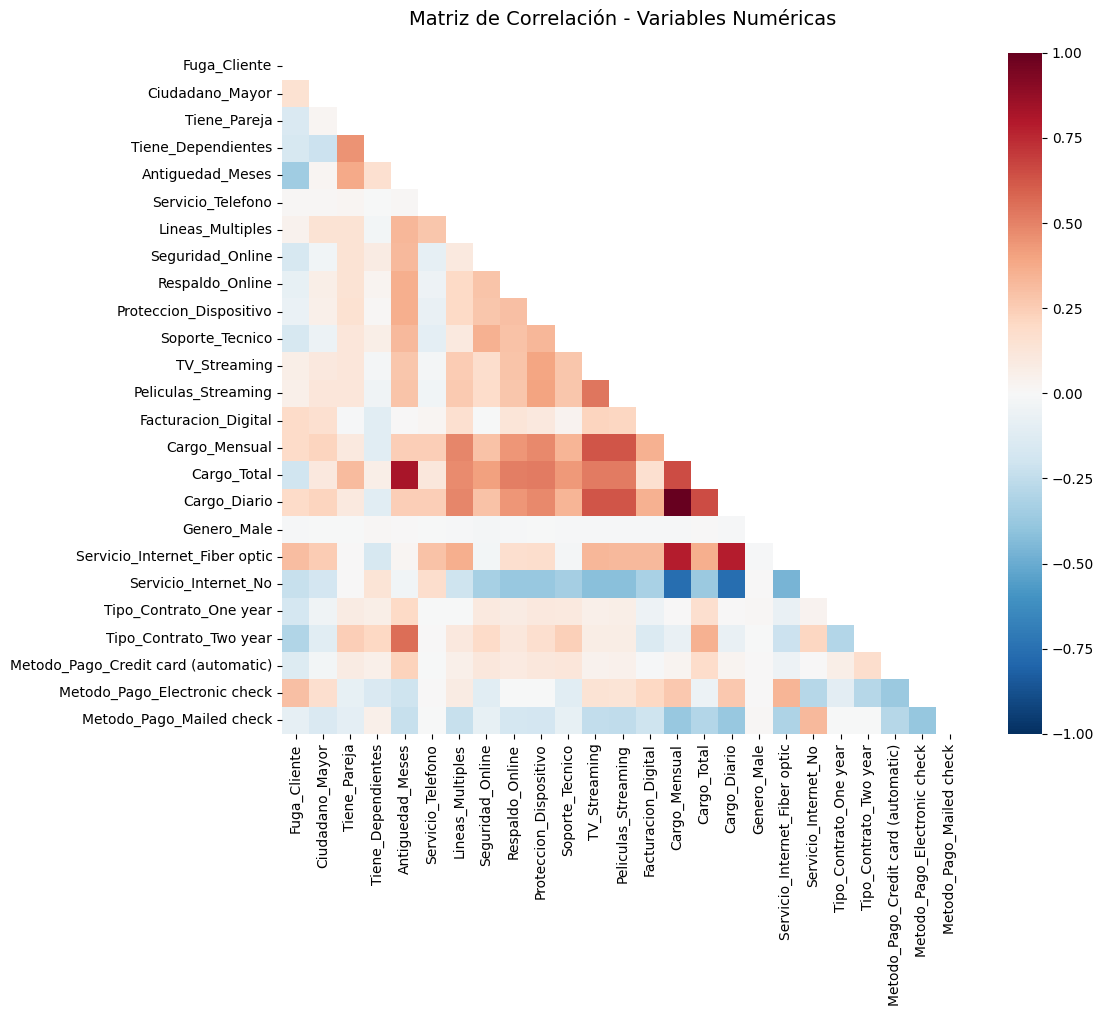

In [13]:
# 3. VISUALIZACIÓN: Matriz de correlación
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Solo triángulo inferior
sns.heatmap(correlation_matrix,
            mask=mask,
            annot=False,  # Sin números (sería muy pequeño)
            cmap='RdBu_r',
            center=0,
            vmin=-1, vmax=1,
            square=True)
plt.title('Matriz de Correlación - Variables Numéricas', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

## **5.4 📈 Ranking Visual:**
**Barplot de las 10 variables más importantes para predecir cancelación**

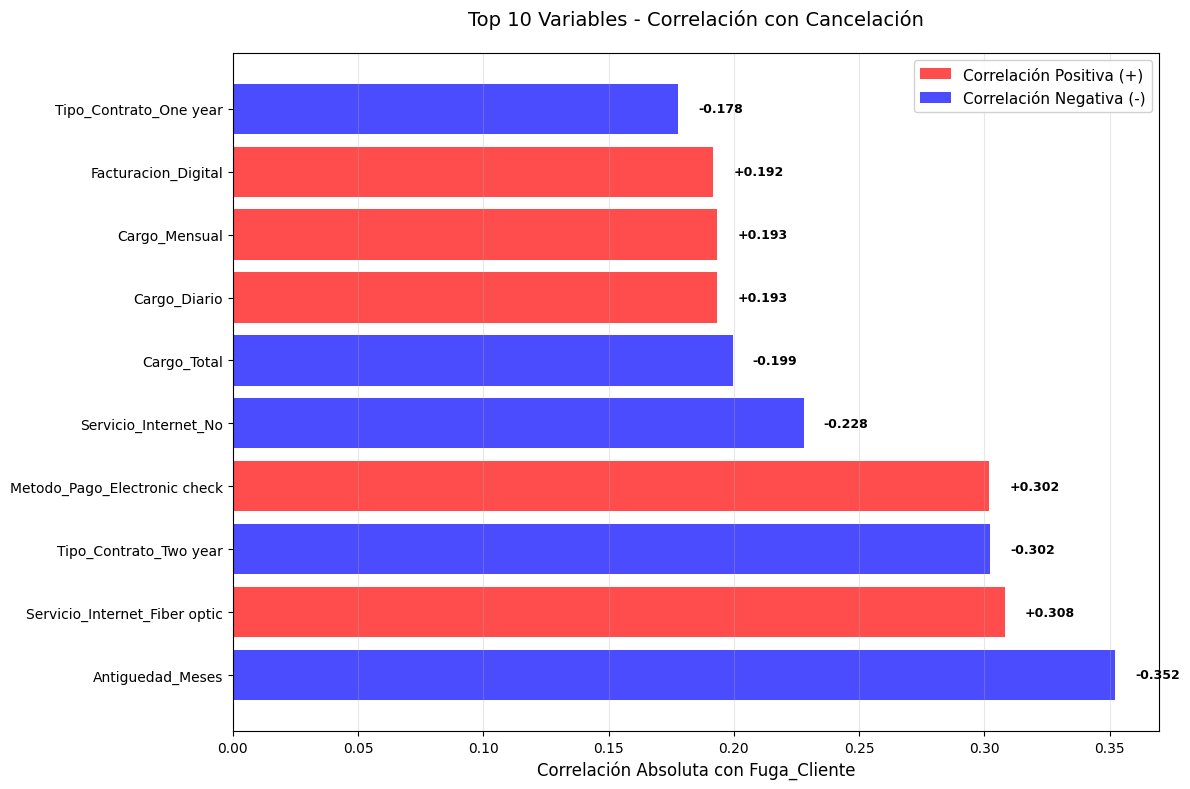


 📊 INTERPRETACIÓN:
🔴 ROJO (+): Mayor valor → Mayor probabilidad de cancelación
🔵 AZUL (-): Mayor valor → Menor probabilidad de cancelación


In [14]:
# 4. VISUALIZACIÓN: Correlaciones con Target

plt.figure(figsize=(12, 8))
target_corr_plot = target_correlations[1:11]  # Excluir Fuga_Cliente consigo misma

# Obtener correlaciones originales (con signo)
original_correlations = correlation_matrix['Fuga_Cliente'][target_corr_plot.index]
colors = ['red' if x > 0 else 'blue' for x in original_correlations]

# Crear gráfico
bars = plt.barh(range(len(target_corr_plot)), target_corr_plot.values, color=colors, alpha=0.7)

# Personalización
plt.yticks(range(len(target_corr_plot)), target_corr_plot.index)
plt.xlabel('Correlación Absoluta con Fuga_Cliente', fontsize=12)
plt.title('Top 10 Variables - Correlación con Cancelación', fontsize=14, pad=20)
plt.grid(axis='x', alpha=0.3)

# LEYENDA EN POSICIÓN SUPERIOR DERECHA
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='red', alpha=0.7, label='Correlación Positiva (+)'),
                   Patch(facecolor='blue', alpha=0.7, label='Correlación Negativa (-)')]
plt.legend(handles=legend_elements, loc='upper right', fontsize=11, framealpha=0.9)

# Agregar valores en las barras
for i, (bar, corr_val) in enumerate(zip(bars, original_correlations)):
    plt.text(bar.get_width() + 0.008, bar.get_y() + bar.get_height()/2,
             f'{corr_val:+.3f}', ha='left', va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n 📊 INTERPRETACIÓN:")
print("🔴 ROJO (+): Mayor valor → Mayor probabilidad de cancelación")
print("🔵 AZUL (-): Mayor valor → Menor probabilidad de cancelación")

# **6. Selección de Features (eliminar correlacionadas)**


In [15]:
# Variables a eliminar por multicolinealidad
features_eliminar = ['Cargo_Diario', 'Cargo_Total']

print("🗑️ VARIABLES A ELIMINAR POR MULTICOLINEALIDAD:")
for feature in features_eliminar:
    if feature == 'Cargo_Diario':
        print(f"  • {feature}: r=1.000 con Cargo_Mensual (redundancia perfecta)")
    elif feature == 'Cargo_Total':
        print(f"  • {feature}: r=0.826 con Antiguedad_Meses (alta correlación)")

# Eliminar features problemáticas
df_ml_features = df_ml_encoded.drop(columns=features_eliminar)

print(f"\n✅ SELECCIÓN COMPLETADA:")
print(f"Columnas antes: {df_ml_encoded.shape[1]}")
print(f"Columnas después: {df_ml_features.shape[1]}")
print(f"Features eliminadas: {len(features_eliminar)}")

# Recalcular correlaciones con target (verificación)
nuevas_correlaciones = df_ml_features.corr()['Fuga_Cliente'].abs().sort_values(ascending=False)
print(f"\n📊 TOP 5 VARIABLES TRAS SELECCIÓN:")
print(nuevas_correlaciones.head(6))  # 6 para incluir target

🗑️ VARIABLES A ELIMINAR POR MULTICOLINEALIDAD:
  • Cargo_Diario: r=1.000 con Cargo_Mensual (redundancia perfecta)
  • Cargo_Total: r=0.826 con Antiguedad_Meses (alta correlación)

✅ SELECCIÓN COMPLETADA:
Columnas antes: 25
Columnas después: 23
Features eliminadas: 2

📊 TOP 5 VARIABLES TRAS SELECCIÓN:
Fuga_Cliente                     1.000000
Antiguedad_Meses                 0.352229
Servicio_Internet_Fiber optic    0.308020
Tipo_Contrato_Two year           0.302253
Metodo_Pago_Electronic check     0.301919
Servicio_Internet_No             0.227890
Name: Fuga_Cliente, dtype: float64


In [16]:
df_ml_features.head(2)

,Fuga_Cliente,Ciudadano_Mayor,Tiene_Pareja,Tiene_Dependientes,Antiguedad_Meses,Servicio_Telefono,Lineas_Multiples,Seguridad_Online,Respaldo_Online,Proteccion_Dispositivo,...,Facturacion_Digital,Cargo_Mensual,Genero_Male,Servicio_Internet_Fiber optic,Servicio_Internet_No,Tipo_Contrato_One year,Tipo_Contrato_Two year,Metodo_Pago_Credit card (automatic),Metodo_Pago_Electronic check,Metodo_Pago_Mailed check
0,0,0,1,1,9,1,0,0,1,0,...,1,65.6,0,0,0,1,0,0,0,1
1,0,0,0,0,9,1,1,0,0,0,...,0,59.9,1,0,0,0,0,0,0,1


# **7. Análisis Dirigido**

## **7.1 📈 ANTIGÜEDAD vs CANCELACIÓN**

/tmp/ipython-input-1843960544.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data_se_quedaron, data_se_fueron],


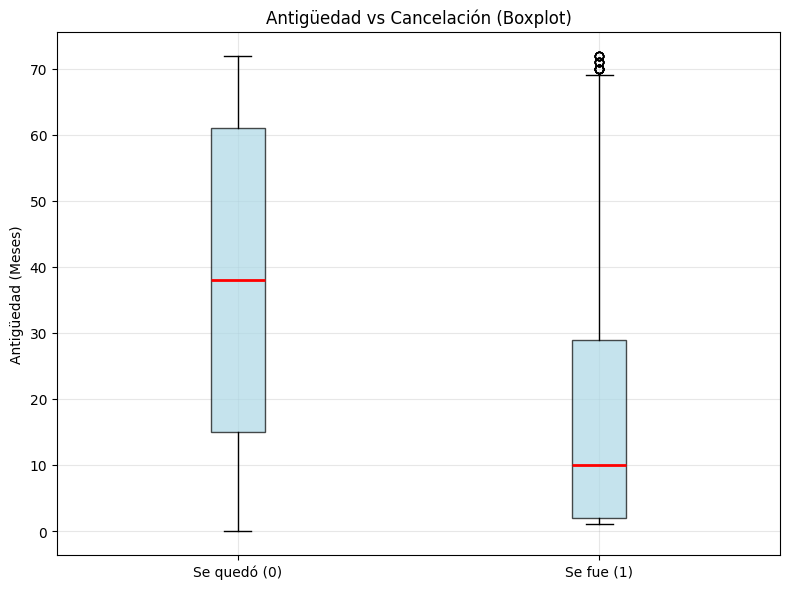

In [17]:
data_se_quedaron = df_ml_features[df_ml_features['Fuga_Cliente']==0]['Antiguedad_Meses']
data_se_fueron = df_ml_features[df_ml_features['Fuga_Cliente']==1]['Antiguedad_Meses']

plt.figure(figsize=(8, 6))
plt.boxplot([data_se_quedaron, data_se_fueron],
            labels=['Se quedó (0)', 'Se fue (1)'],
            patch_artist=True,
            boxprops=dict(facecolor='lightblue', alpha=0.7),
            medianprops=dict(color='red', linewidth=2))
plt.title('Antigüedad vs Cancelación (Boxplot)')
plt.ylabel('Antigüedad (Meses)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## **7.2 📈 CARGO MENSUAL vs CANCELACIÓN**

/tmp/ipython-input-605379219.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data_cargo_quedaron, data_cargo_fueron],


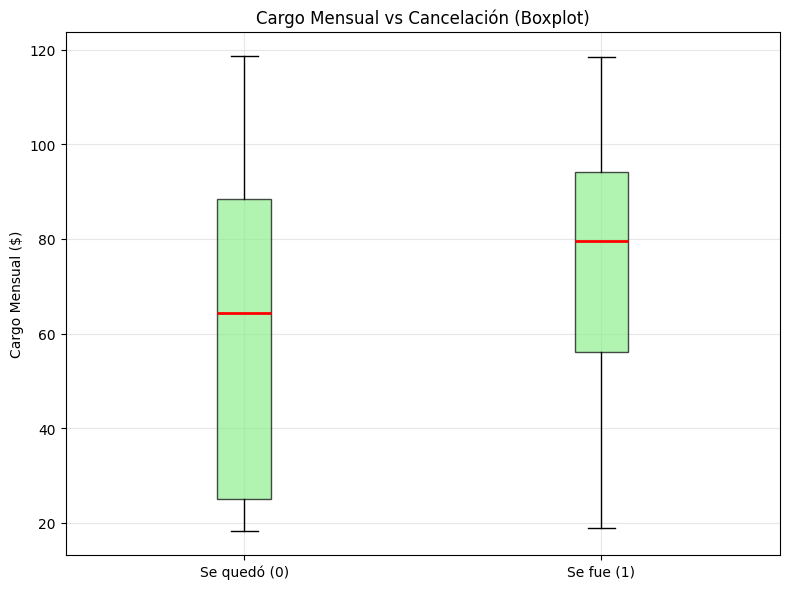

In [18]:
data_cargo_quedaron = df_ml_features[df_ml_features['Fuga_Cliente']==0]['Cargo_Mensual']
data_cargo_fueron = df_ml_features[df_ml_features['Fuga_Cliente']==1]['Cargo_Mensual']

plt.figure(figsize=(8, 6))
plt.boxplot([data_cargo_quedaron, data_cargo_fueron],
            labels=['Se quedó (0)', 'Se fue (1)'],
            patch_artist=True,
            boxprops=dict(facecolor='lightgreen', alpha=0.7),
            medianprops=dict(color='red', linewidth=2))
plt.title('Cargo Mensual vs Cancelación (Boxplot)')
plt.ylabel('Cargo Mensual ($)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## **7.3 📈 ANTIGÜEDAD vs CARGO MENSUAL**


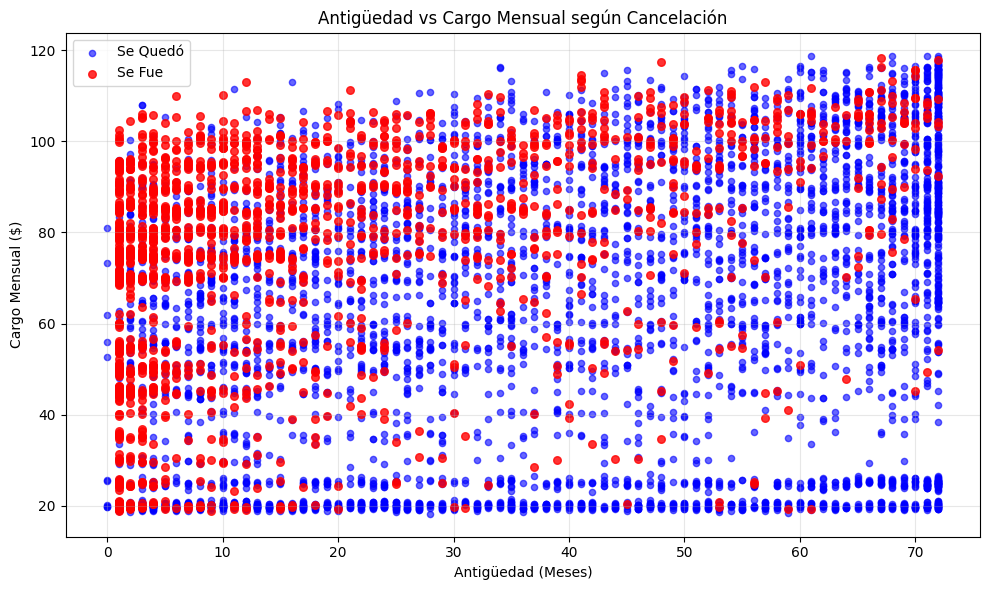

In [19]:
# Separar datos por grupo
se_quedaron = df_ml_features[df_ml_features['Fuga_Cliente'] == 0]
se_fueron = df_ml_features[df_ml_features['Fuga_Cliente'] == 1]

plt.figure(figsize=(10, 6))
plt.scatter(se_quedaron['Antiguedad_Meses'], se_quedaron['Cargo_Mensual'],
           alpha=0.6, c='blue', s=20, label='Se Quedó')
plt.scatter(se_fueron['Antiguedad_Meses'], se_fueron['Cargo_Mensual'],
           alpha=0.8, c='red', s=30, label='Se Fue')

plt.title('Antigüedad vs Cargo Mensual según Cancelación')
plt.xlabel('Antigüedad (Meses)')
plt.ylabel('Cargo Mensual ($)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## **7.4 Resumen Final Análisis Dirigido (conclusiones clave)**

In [20]:
print("\n📊 INSIGHTS CONFIRMADOS:")
print(f"• Antigüedad: Se van los que tienen {data_se_quedaron.mean() - data_se_fueron.mean():.1f} meses MENOS")
print(f"• Cargo: Se van los que pagan ${data_cargo_fueron.mean() - data_cargo_quedaron.mean():.2f} MÁS por mes")
print("• Patrón crítico: 'Clientes nuevos + alto gasto = mayor riesgo'")

print(f"\n🎯 VARIABLES MÁS PREDICTIVAS VALIDADAS:")
print("1. Antiguedad_Meses: r=-0.352")
print("2. Servicio_Internet_Fiber optic: r=+0.308")
print("3. Tipo_Contrato_Two year: r=-0.302")
print("4. Metodo_Pago_Electronic check: r=+0.302")


📊 INSIGHTS CONFIRMADOS:
• Antigüedad: Se van los que tienen 19.6 meses MENOS
• Cargo: Se van los que pagan $13.18 MÁS por mes
• Patrón crítico: 'Clientes nuevos + alto gasto = mayor riesgo'

🎯 VARIABLES MÁS PREDICTIVAS VALIDADAS:
1. Antiguedad_Meses: r=-0.352
2. Servicio_Internet_Fiber optic: r=+0.308
3. Tipo_Contrato_Two year: r=-0.302
4. Metodo_Pago_Electronic check: r=+0.302


# **8. VERIFICACIÓN BALANCE DE CLASES**

## **8.1 CONTEO Y PROPORCIÓN BÁSICA**

In [21]:
# 1. CONTEO ABSOLUTO DE CLASES
print("\n📊 CONTEO ABSOLUTO:")
conteo_clases = df_ml_features['Fuga_Cliente'].value_counts().sort_index()
print(conteo_clases)

# 2. PROPORCIÓN PORCENTUAL
print(f"\n📈 PROPORCIÓN PORCENTUAL:")
proporcion_clases = df_ml_features['Fuga_Cliente'].value_counts(normalize=True).sort_index() * 100
print(f"Clase 0 (Se quedó): {proporcion_clases[0]:.2f}%")
print(f"Clase 1 (Se fue):   {proporcion_clases[1]:.2f}%")

# 3. RATIO DE DESBALANCE
ratio_desbalance = proporcion_clases[0] / proporcion_clases[1]
print(f"\n⚖️ RATIO DE DESBALANCE:")
print(f"Ratio Se quedó / Se fue: {ratio_desbalance:.2f}:1")
print(f"Por cada cliente que se va, {ratio_desbalance:.1f} se quedan")

# 4. EVALUACIÓN DEL DESBALANCE
print(f"\n🎯 EVALUACIÓN:")
if proporcion_clases.min() < 20:
    print("❌ DATASET DESBALANCEADO (clase minoritaria < 20%)")
    necesita_balanceo = True
elif proporcion_clases.min() < 30:
    print("⚠️  DESBALANCE MODERADO (clase minoritaria < 30%)")
    necesita_balanceo = True
else:
    print("✅ DATASET RELATIVAMENTE BALANCEADO")
    necesita_balanceo = False

print(f"Necesita balanceo: {'SÍ' if necesita_balanceo else 'NO'}")


📊 CONTEO ABSOLUTO:
Fuga_Cliente
0    5174
1    1869
Name: count, dtype: int64

📈 PROPORCIÓN PORCENTUAL:
Clase 0 (Se quedó): 73.46%
Clase 1 (Se fue):   26.54%

⚖️ RATIO DE DESBALANCE:
Ratio Se quedó / Se fue: 2.77:1
Por cada cliente que se va, 2.8 se quedan

🎯 EVALUACIÓN:
⚠️  DESBALANCE MODERADO (clase minoritaria < 30%)
Necesita balanceo: SÍ


## **8.2 VISUALIZACIÓN DEL BALANCE**

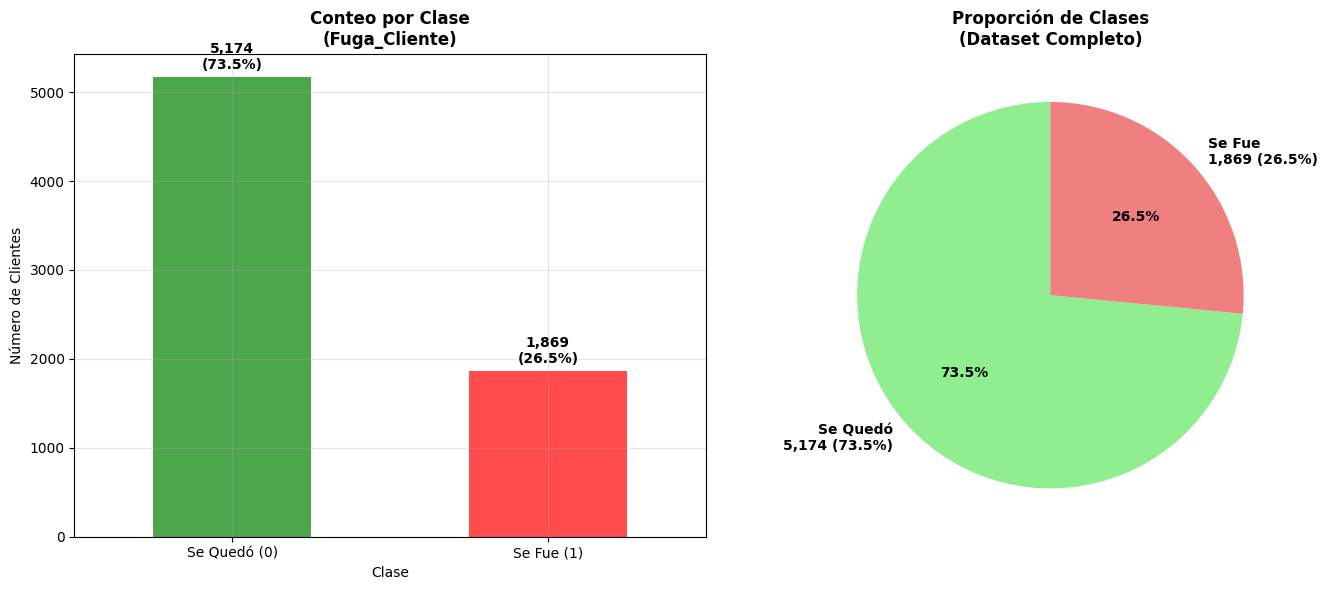

In [22]:
# Crear visualizaciones
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# 1. GRÁFICO DE BARRAS
conteo_clases.plot(kind='bar', ax=ax1, color=['green', 'red'], alpha=0.7)
ax1.set_title('Conteo por Clase\n(Fuga_Cliente)', fontsize=12, fontweight='bold')
ax1.set_xlabel('Clase')
ax1.set_ylabel('Número de Clientes')
ax1.set_xticklabels(['Se Quedó (0)', 'Se Fue (1)'], rotation=0)
ax1.grid(True, alpha=0.3)

# Añadir valores encima de las barras
for i, v in enumerate(conteo_clases.values):
    ax1.text(i, v + 50, f'{v:,}\n({proporcion_clases.iloc[i]:.1f}%)',
             ha='center', va='bottom', fontweight='bold')

# 2. GRÁFICO DE TORTA
colors = ['lightgreen', 'lightcoral']
labels = [f'Se Quedó\n{conteo_clases[0]:,} ({proporcion_clases[0]:.1f}%)',
          f'Se Fue\n{conteo_clases[1]:,} ({proporcion_clases[1]:.1f}%)']

ax2.pie(conteo_clases.values, labels=labels, colors=colors, autopct='%1.1f%%',
        startangle=90, textprops={'fontsize': 10, 'fontweight': 'bold'})
ax2.set_title('Proporción de Clases\n(Dataset Completo)', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

## **8.3 VERIFICACIÓN BALANCE DE CLASES - RESUMEN FINAL**

In [23]:
# Resumen ejecutivo
total_clientes = len(df_ml_features)
clientes_se_fueron = conteo_clases[1]
clientes_se_quedaron = conteo_clases[0]

print(f"\n📋 RESUMEN EJECUTIVO:")
print(f"• Total de clientes: {total_clientes:,}")
print(f"• Se quedaron: {clientes_se_quedaron:,} ({proporcion_clases[0]:.1f}%)")
print(f"• Se fueron: {clientes_se_fueron:,} ({proporcion_clases[1]:.1f}%)")
print(f"• Ratio desbalance: {ratio_desbalance:.1f}:1")

# Diagnóstico final
print(f"\n🎯 DIAGNÓSTICO FINAL:")
if proporcion_clases[1] < 20:
    estado = "CRÍTICO"
    color_estado = "❌"
elif proporcion_clases[1] < 30:
    estado = "MODERADO"
    color_estado = "⚠️ "
else:
    estado = "ACEPTABLE"
    color_estado = "✅"

print(f"{color_estado} Estado del balance: {estado}")
print(f"• Clase minoritaria: {proporcion_clases[1]:.1f}%")
print(f"• Requiere SMOTE: {'SÍ' if necesita_balanceo else 'OPCIONAL'}")

# Métricas a usar
print(f"\n📊 MÉTRICAS RECOMENDADAS PARA EVALUACIÓN:")
if necesita_balanceo:
    print("• F1-Score (PRINCIPAL)")
    print("• Precision y Recall por clase")
    print("• ROC-AUC")
    print("• Accuracy (SECUNDARIA)")
else:
    print("• Accuracy (PRINCIPAL)")
    print("• F1-Score")
    print("• Precision y Recall")


📋 RESUMEN EJECUTIVO:
• Total de clientes: 7,043
• Se quedaron: 5,174 (73.5%)
• Se fueron: 1,869 (26.5%)
• Ratio desbalance: 2.8:1

🎯 DIAGNÓSTICO FINAL:
⚠️  Estado del balance: MODERADO
• Clase minoritaria: 26.5%
• Requiere SMOTE: SÍ

📊 MÉTRICAS RECOMENDADAS PARA EVALUACIÓN:
• F1-Score (PRINCIPAL)
• Precision y Recall por clase
• ROC-AUC
• Accuracy (SECUNDARIA)


# **9.  TRAIN/TEST SPLIT ESTRATIFICADO**

## **9.1 PREPARACIÓN Y SEPARACIÓN DE DATOS**

In [24]:
# 1. PREPARAR CARACTERÍSTICAS (X) Y TARGET (y)
print("\n📊 PREPARACIÓN DE DATOS:")

# Separar features (X) y target (y)
X = df_ml_features.drop('Fuga_Cliente', axis=1)  # Todas las columnas excepto el target
y = df_ml_features['Fuga_Cliente']               # Solo el target

print(f"• Features (X): {X.shape[0]:,} filas x {X.shape[1]} columnas")
print(f"• Target (y): {len(y):,} valores")

# Mostrar las features que usaremos
print(f"\n🎯 FEATURES PARA MODELADO ({len(X.columns)}):")
for i, feature in enumerate(X.columns, 1):
    print(f"{i:2d}. {feature}")

# 2. DIVISIÓN ESTRATIFICADA
print(f"\n🔀 REALIZANDO DIVISIÓN ESTRATIFICADA:")
print("Parámetros:")
print("• Proporción train: 80% | test: 20%")
print("• Estratificación: SÍ (mantiene proporción original)")
print("• Random state: 42 (reproducibilidad)")

# Realizar el split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,      # 20% para test
    random_state=42,     # Reproducibilidad
    stratify=y           # Mantener proporción de clases
)

print(f"\n✅ DIVISIÓN COMPLETADA:")
print(f"• Train set: {X_train.shape[0]:,} registros")
print(f"• Test set:  {X_test.shape[0]:,} registros")
print(f"• Features:  {X_train.shape[1]} variables")


📊 PREPARACIÓN DE DATOS:
• Features (X): 7,043 filas x 22 columnas
• Target (y): 7,043 valores

🎯 FEATURES PARA MODELADO (22):
 1. Ciudadano_Mayor
 2. Tiene_Pareja
 3. Tiene_Dependientes
 4. Antiguedad_Meses
 5. Servicio_Telefono
 6. Lineas_Multiples
 7. Seguridad_Online
 8. Respaldo_Online
 9. Proteccion_Dispositivo
10. Soporte_Tecnico
11. TV_Streaming
12. Peliculas_Streaming
13. Facturacion_Digital
14. Cargo_Mensual
15. Genero_Male
16. Servicio_Internet_Fiber optic
17. Servicio_Internet_No
18. Tipo_Contrato_One year
19. Tipo_Contrato_Two year
20. Metodo_Pago_Credit card (automatic)
21. Metodo_Pago_Electronic check
22. Metodo_Pago_Mailed check

🔀 REALIZANDO DIVISIÓN ESTRATIFICADA:
Parámetros:
• Proporción train: 80% | test: 20%
• Estratificación: SÍ (mantiene proporción original)
• Random state: 42 (reproducibilidad)

✅ DIVISIÓN COMPLETADA:
• Train set: 5,634 registros
• Test set:  1,409 registros
• Features:  22 variables


## **9.2 VERIFICACIÓN DEL BALANCE EN AMBOS CONJUNTOS**

In [25]:
# 1. VERIFICAR BALANCE EN CONJUNTO ORIGINAL
print("🔍 BALANCE EN CONJUNTO ORIGINAL:")
balance_original = y.value_counts(normalize=True).sort_index() * 100
print(f"• Clase 0 (Se quedó): {balance_original[0]:.1f}%")
print(f"• Clase 1 (Se fue):   {balance_original[1]:.1f}%")

# 2. VERIFICAR BALANCE EN TRAIN SET
print(f"\n🚂 BALANCE EN TRAIN SET:")
balance_train = y_train.value_counts(normalize=True).sort_index() * 100
conteo_train = y_train.value_counts().sort_index()
print(f"• Clase 0 (Se quedó): {conteo_train[0]:,} ({balance_train[0]:.1f}%)")
print(f"• Clase 1 (Se fue):   {conteo_train[1]:,} ({balance_train[1]:.1f}%)")

# 3. VERIFICAR BALANCE EN TEST SET
print(f"\n🧪 BALANCE EN TEST SET:")
balance_test = y_test.value_counts(normalize=True).sort_index() * 100
conteo_test = y_test.value_counts().sort_index()
print(f"• Clase 0 (Se quedó): {conteo_test[0]:,} ({balance_test[0]:.1f}%)")
print(f"• Clase 1 (Se fue):   {conteo_test[1]:,} ({balance_test[1]:.1f}%)")

🔍 BALANCE EN CONJUNTO ORIGINAL:
• Clase 0 (Se quedó): 73.5%
• Clase 1 (Se fue):   26.5%

🚂 BALANCE EN TRAIN SET:
• Clase 0 (Se quedó): 4,139 (73.5%)
• Clase 1 (Se fue):   1,495 (26.5%)

🧪 BALANCE EN TEST SET:
• Clase 0 (Se quedó): 1,035 (73.5%)
• Clase 1 (Se fue):   374 (26.5%)


# **10. SMOTE**

## **10.1 PREPARACIÓN E INSTALACIÓN**

In [26]:
# Instalar imbalanced-learn si no está disponible
try:
    from imblearn.over_sampling import SMOTE

except ImportError:
    print("📦 Instalando imbalanced-learn...")
    !pip install imbalanced-learn
    from imblearn.over_sampling import SMOTE

from collections import Counter

# 1. ESTADO INICIAL DEL TRAIN SET
print("\n📊 ESTADO INICIAL (ANTES DE SMOTE):")
print(f"• X_train shape: {X_train.shape}")
print(f"• y_train shape: {y_train.shape}")

# Contar clases originales
contador_original = Counter(y_train)
total_original = len(y_train)

print(f"\n📈 DISTRIBUCIÓN ORIGINAL EN TRAIN:")
for clase, cantidad in sorted(contador_original.items()):
    porcentaje = (cantidad / total_original) * 100
    etiqueta = "Se quedó" if clase == 0 else "Se fue"
    print(f"• Clase {clase} ({etiqueta}): {cantidad:,} ({porcentaje:.1f}%)")

# Calcular cuántos registros sintéticos se crearán
clase_mayoritaria = max(contador_original.values())
clase_minoritaria = min(contador_original.values())
registros_sinteticos = clase_mayoritaria - clase_minoritaria

print(f"\n🎯 SMOTE GENERARÁ:")
print(f"• {registros_sinteticos:,} registros sintéticos de la clase minoritaria")
print(f"• Total después de SMOTE: {clase_mayoritaria * 2:,} registros")
print(f"• Balance final: 50% - 50%")


📊 ESTADO INICIAL (ANTES DE SMOTE):
• X_train shape: (5634, 22)
• y_train shape: (5634,)

📈 DISTRIBUCIÓN ORIGINAL EN TRAIN:
• Clase 0 (Se quedó): 4,139 (73.5%)
• Clase 1 (Se fue): 1,495 (26.5%)

🎯 SMOTE GENERARÁ:
• 2,644 registros sintéticos de la clase minoritaria
• Total después de SMOTE: 8,278 registros
• Balance final: 50% - 50%


## **10.2 APLICACIÓN DE SMOTE AL TRAIN SET**

In [27]:
# 1. CONFIGURAR SMOTE
print("⚙️  CONFIGURACIÓN DE SMOTE:")
smote = SMOTE(
    random_state=42,          # Reproducibilidad
    k_neighbors=5,            # Vecinos para generar sintéticos (default)
    sampling_strategy='auto'   # Balancear automáticamente
)
print("• random_state: 42 (reproducible)")
print("• k_neighbors: 5 (vecinos cercanos)")
print("• sampling_strategy: 'auto' (balance completo)")

# 2. APLICAR SMOTE SOLO AL TRAIN SET
print(f"\n🚀 APLICANDO SMOTE...")
print("⚠️  IMPORTANTE: Solo se aplica al TRAIN SET (no al test)")

# Aplicar SMOTE
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(f"✅ SMOTE aplicado exitosamente")

# 3. VERIFICAR RESULTADOS
print(f"\n📊 RESULTADOS POST-SMOTE:")
contador_smote = Counter(y_train_smote)
total_smote = len(y_train_smote)

print(f"• X_train_smote shape: {X_train_smote.shape}")
print(f"• y_train_smote shape: {y_train_smote.shape}")

print(f"\n📈 NUEVA DISTRIBUCIÓN EN TRAIN:")
for clase, cantidad in sorted(contador_smote.items()):
    porcentaje = (cantidad / total_smote) * 100
    etiqueta = "Se quedó" if clase == 0 else "Se fue"
    print(f"• Clase {clase} ({etiqueta}): {cantidad:,} ({porcentaje:.1f}%)")

# 4. CALCULAR INCREMENTO
incremento_total = total_smote - total_original
print(f"\n📈 INCREMENTO:")
print(f"• Registros originales: {total_original:,}")
print(f"• Registros después SMOTE: {total_smote:,}")
print(f"• Incremento: +{incremento_total:,} registros ({(incremento_total/total_original)*100:.1f}%)")

⚙️  CONFIGURACIÓN DE SMOTE:
• random_state: 42 (reproducible)
• k_neighbors: 5 (vecinos cercanos)
• sampling_strategy: 'auto' (balance completo)

🚀 APLICANDO SMOTE...
⚠️  IMPORTANTE: Solo se aplica al TRAIN SET (no al test)
✅ SMOTE aplicado exitosamente

📊 RESULTADOS POST-SMOTE:
• X_train_smote shape: (8278, 22)
• y_train_smote shape: (8278,)

📈 NUEVA DISTRIBUCIÓN EN TRAIN:
• Clase 0 (Se quedó): 4,139 (50.0%)
• Clase 1 (Se fue): 4,139 (50.0%)

📈 INCREMENTO:
• Registros originales: 5,634
• Registros después SMOTE: 8,278
• Incremento: +2,644 registros (46.9%)


# **11.NORMALIZACIÓN**

## **11.1 ANÁLISIS DE VARIABLES Y NECESIDAD DE NORMALIZACIÓN**

In [28]:
# 1. ANÁLISIS DE LAS VARIABLES NUMÉRICAS
print("\n🔍 ANÁLISIS DE VARIABLES PARA NORMALIZACIÓN:")

# Identificar variables numéricas (no dummy/binarias)
variables_numericas = []
variables_binarias = []

for col in X_train_smote.columns:
    valores_unicos = X_train_smote[col].nunique()
    if valores_unicos == 2 and set(X_train_smote[col].unique()) == {0, 1}:
        variables_binarias.append(col)
    else:
        variables_numericas.append(col)

print(f"\n📊 CLASIFICACIÓN DE VARIABLES:")
print(f"• Variables numéricas (requieren normalización): {len(variables_numericas)}")
for var in variables_numericas:
    print(f"  - {var}")

print(f"\n• Variables binarias (NO requieren normalización): {len(variables_binarias)}")
for var in variables_binarias[:5]:  # Mostrar solo las primeras 5
    print(f"  - {var}")
if len(variables_binarias) > 5:
    print(f"  - ... y {len(variables_binarias)-5} más")

# 2. ESTADÍSTICAS DE VARIABLES NUMÉRICAS
if variables_numericas:
    print(f"\n📈 ESTADÍSTICAS DE VARIABLES NUMÉRICAS (Train SMOTE):")
    stats_numericas = X_train_smote[variables_numericas].describe()
    print(stats_numericas.round(2))

    # Identificar variables con escalas muy diferentes
    print(f"\n⚖️  ANÁLISIS DE ESCALAS:")
    for var in variables_numericas:
        min_val = X_train_smote[var].min()
        max_val = X_train_smote[var].max()
        rango = max_val - min_val
        print(f"• {var:20}: Rango [{min_val:6.1f} - {max_val:6.1f}] = {rango:6.1f}")



🔍 ANÁLISIS DE VARIABLES PARA NORMALIZACIÓN:

📊 CLASIFICACIÓN DE VARIABLES:
• Variables numéricas (requieren normalización): 2
  - Antiguedad_Meses
  - Cargo_Mensual

• Variables binarias (NO requieren normalización): 20
  - Ciudadano_Mayor
  - Tiene_Pareja
  - Tiene_Dependientes
  - Servicio_Telefono
  - Lineas_Multiples
  - ... y 15 más

📈 ESTADÍSTICAS DE VARIABLES NUMÉRICAS (Train SMOTE):
       Antiguedad_Meses  Cargo_Mensual
count           8278.00        8278.00
mean              27.48          67.70
std               24.08          28.65
min                0.00          18.40
25%                4.00          45.50
50%               21.00          74.50
75%               49.00          90.40
max               72.00         118.75

⚖️  ANÁLISIS DE ESCALAS:
• Antiguedad_Meses    : Rango [   0.0 -   72.0] =   72.0
• Cargo_Mensual       : Rango [  18.4 -  118.8] =  100.3


## **11.2 APLICACIÓN DE STANDARDSCALER**

In [29]:
# 1. CONFIGURAR STANDARDSCALER
print("🔧 CONFIGURACIÓN DE STANDARDSCALER:")
scaler = StandardScaler()
print("• Método: Z-score standardization")
print("• Fórmula: (x - μ) / σ")
print("• Resultado: Media = 0, Desviación = 1")

# 2. AJUSTAR SCALER SOLO CON TRAIN SET (evitar data leakage)
print(f"\n🛡️  AJUSTE DE PARÁMETROS (SOLO TRAIN SET):")
print("⚠️  CRÍTICO: Parámetros calculados SOLO desde X_train_smote")

# Ajustar el scaler solo con datos de entrenamiento
scaler.fit(X_train_smote)
print("✅ Scaler ajustado con train set")

# Obtener estadísticas del scaler
medias = scaler.mean_
desviaciones = scaler.scale_

print(f"\n📊 PARÁMETROS CALCULADOS (desde train set):")
if variables_numericas:
    for i, var in enumerate(X_train_smote.columns):
        if var in variables_numericas:
            print(f"• {var:20}: μ = {medias[i]:8.2f}, σ = {desviaciones[i]:6.2f}")

# 3. APLICAR NORMALIZACIÓN A AMBOS SETS
print(f"\n🔄 APLICANDO NORMALIZACIÓN:")

# Normalizar train set (con SMOTE)
X_train_scaled = scaler.transform(X_train_smote)
print("✅ Train set normalizado (X_train_smote → X_train_scaled)")

# Normalizar test set (CON LOS MISMOS PARÁMETROS)
X_test_scaled = scaler.transform(X_test)
print("✅ Test set normalizado (X_test → X_test_scaled)")
print("   📌 Usando MISMOS parámetros del train set")

# Convertir de nuevo a DataFrames para mantener nombres de columnas
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_smote.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print(f"\n📏 CONJUNTOS NORMALIZADOS:")
print(f"• X_train_scaled: {X_train_scaled.shape}")
print(f"• X_test_scaled:  {X_test_scaled.shape}")
print(f"• Mantienen nombres de columnas: ✅")

🔧 CONFIGURACIÓN DE STANDARDSCALER:
• Método: Z-score standardization
• Fórmula: (x - μ) / σ
• Resultado: Media = 0, Desviación = 1

🛡️  AJUSTE DE PARÁMETROS (SOLO TRAIN SET):
⚠️  CRÍTICO: Parámetros calculados SOLO desde X_train_smote
✅ Scaler ajustado con train set

📊 PARÁMETROS CALCULADOS (desde train set):
• Antiguedad_Meses    : μ =    27.48, σ =  24.08
• Cargo_Mensual       : μ =    67.70, σ =  28.65

🔄 APLICANDO NORMALIZACIÓN:
✅ Train set normalizado (X_train_smote → X_train_scaled)
✅ Test set normalizado (X_test → X_test_scaled)
   📌 Usando MISMOS parámetros del train set

📏 CONJUNTOS NORMALIZADOS:
• X_train_scaled: (8278, 22)
• X_test_scaled:  (1409, 22)
• Mantienen nombres de columnas: ✅
